In [3]:
%matplotlib inline

# Cobb-Douglas Function

A Cobb-Douglas production function (in the formulation of the textbook) is

\begin{align}
  Y = F(K, AL; \alpha) = K^\alpha (AL)^{1-\alpha},
\end{align}

where in the function, I made it clear that $F$ depends on a parameter $\alpha$. 

The input variables represent:

- $K$: capital input
- $L$: labor input
- $A$: effectiveness of labor

and the parameter represents:

- $\alpha$: output elasticity of capital, ($0 < \alpha < 1$)

i.e.

\begin{align}
    \alpha = \frac{K}{Y} \frac{\partial F}{\partial K}.
\end{align}

In this note, let's code this function to see the shape and properties. It's a small note but you'll learn many important things here.

## Making a function in Python

You learned how to call log and exp functions from `math` standard library. In application, you will have to define many user-defined functions. 

Functions in programing languages are conceptually different from functions in mathematics. The former is much broader. Functions in programing languages are used to

- code mathematical functions
- bind multiple jobs to put a label on the procudure 
- bind multiple jobs to call them many times

A functions in a programing language may or may not have an input (argument, parameter); it may or may not have an output (return value). 

The basic syntax to define a function in Python is as follows:

    def function_name([list of inputs]):
        [do something]
        return output
        
Let's see an example.

In [4]:
def double(x):
    y = 2 * x
    return y

In [5]:
double(1.4)

2.8

In [6]:
double(-3.8)

-7.6

In [7]:
def straightline(x, a, b):
    y = a * x + b
    return y

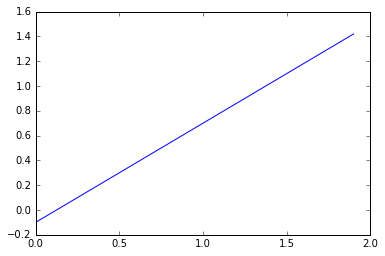

In [8]:
import matplotlib.pyplot as plt

x = [i*0.1 for i in range(20)]
a = [0.8] * 20   # What does this code do?
b = [-0.1] * 20
y = [straightline(xx, aa, bb) for (xx, aa, bb) in zip(x, a, b)]   # What does zip() do?

plt.plot(x, y)

## Making Parameterized function in Python

To code a parametrized function in Python is really easy. Consider the following simplest example.

In [9]:
def nfold(n):
    def f(x):
        return n * x
    return f

In [10]:
f = nfold(10)
f(2)

20

With a parameterized function,

- you pick a parameter and then you have a function.

In other words,

- the parametrized function receives a parameter and returns a function.

A natural way of coding a parametrized function is to code as **a function that returns a function**. Python can create such function in an intuitive way; i.e., nested function definitions do the job.

### Cobb-Douglas

Now straightforward to code Cobb-Douglas functons.

In [11]:
def cobbdouglas(alpha):
    def F(K, AL):
        return K**alpha * (AL)**(1-alpha)  # body of definition
    return F

In [12]:
F = cobbdouglas(0.3)
F(1, 2)

1.624504792712471

In the above definition, we assume that $A$ and $L$ come always in the form of multiple. Another way of implementing the Cobb-Douglas function class is the following. Usually, there is no single solution when implementing mathematical concept. Choice is up to you.

In [13]:
def cobbdouglas2(alpha):
    def F(A, K, L):
        return K**alpha * (A * L)**(1-alpha)
    return F

## Making a 3D plot

Making a 3D plot is not very easy. On your first reading, you don't have to understand the codes used here. Try to read the graphs. In the below code, we use the numpy library.

In [14]:
# Parameters
A = 1.1
alpha = 0.32

# Cobb-Douglas Function
F = cobbdouglass(alpha)

In [20]:
# import scientific library numpy with the commonly used alias "np"
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# numpy.linspace(a, b, n) (or np.linspace with the alias) makes
# evenly spaced n grid points for [a,b]. 
k = np.linspace(0.0, 3.0, 80)
el = np.linspace(0.0, 3.0, 80)
al = A * el

# numpy.meshgrid makes grid points on xy-plane.
K, AL = np.meshgrid(k, al)

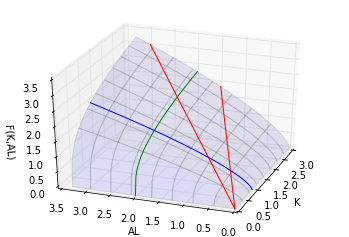

In [33]:
fig = plt.figure()
# When making 3D plot call fig.add_subplot() method with projection='3d'
ax = fig.add_subplot(111, projection='3d')

# Put axis labels
ax.set_xlabel('K')
ax.set_ylabel('AL')
ax.set_zlabel('F(K,AL)')

# Plot the surface of a Cobb-Douglas Function
ax.plot_surface(K, AL, F(K, AL), alpha=0.1)

ax.plot(k, el, F(k, el), 
        color='red', linestyle='solid')

ax.plot(k, 0.5*el, F(k, 0.5*el), 
        color='red', linestyle='solid')

ax.plot(k, [2 for _ in k], F(k, 2), 
        color='green', linestyle='solid')

ax.plot([0.9 for _ in al], al, F(0.9, al), 
        color='blue', linestyle='solid')

ax.view_init(azim=200)

The above graph shows that

- If you fix $AL$ and if you consider $F(K, AL)$ as a function of $K$, it has decreasing marginal returns. (Blue curve)
- If you fix $K$ and if you consider $F(K, AL)$ as a function of $AL$, it has decreasing marginal returns. (Green curve)
- As functions of $(K, AL)$, $F$ has constant marginal returns. (Red straight lines)


### Making contour plot

Another method to visualize 3D functions (functions with two inputs) is a contour plot (indifference curves, isoquant). Making it is much easier than a 3D plot.

<a list of 6 text.Text objects>

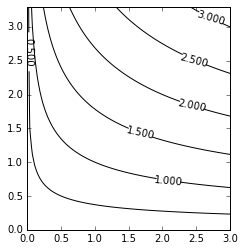

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# Making contour plots
CS = ax.contour(K, AL, F(K, AL),
                origin='lower', linewidth=2, colors='black')

# Putting a label on each curve
plt.clabel(CS, fontsize=10, inline=1)